In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nltk
import spacy


In [ ]:
df = pd.read_csv('/content/data_science_job.csv')  # Replace with your actual filename
df.head()


,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,Analysis,EUR,186597,136086,US,MI,CT,Remote,DE,L
1,2020,Statistician (Remote),ML/AI,JPY,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,INR,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,ML/AI,JPY,154130,135242,DE,SE,FT,Hybrid,MX,L
4,2020,Statistician,Data Science,EUR,172312,35156,UK,MI,FT,In-person,UK,S


In [ ]:
# Number of rows and columns
print(f"Dataset shape: {df.shape}")

# Column names
print("\nColumn Names:")
print(df.columns)

# Data types
print("\nData Types:")
print(df.dtypes)

# Null values
print("\nMissing Values:")
print(df.isnull().sum())

# Quick statistical overview
df.describe(include='all')


Dataset shape: (5000, 12)

Column Names:
Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

Data Types:
work_year              int64
job_title             object
job_category          object
salary_currency       object
salary                 int64
salary_in_usd          int64
employee_residence    object
experience_level      object
employment_type       object
work_setting          object
company_location      object
company_size          object
dtype: object

Missing Values:
work_year               0
job_title               0
job_category          500
salary_currency       500
salary                  0
salary_in_usd           0
employee_residence      0
experience_level      500
employment_type         0
work_setting            0
company_location        0
company_size          500
dtype: int

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
count,5000.00000,5000,4500,4500,5000.000000,5000.000000,5000,4500,5000,5000,5000,4500
unique,NaN,15,4,5,NaN,NaN,7,4,4,3,7,3
top,NaN,Data Engineer in office,Data Science,EUR,NaN,NaN,JP,SE,PT,Hybrid,UK,S
freq,NaN,372,1173,962,NaN,NaN,783,1154,1268,1721,789,1519
mean,2020.97680,NaN,NaN,NaN,102046.307200,114076.995800,NaN,NaN,NaN,NaN,NaN,NaN
std,0.81951,NaN,NaN,NaN,70853.626492,49113.807687,NaN,NaN,NaN,NaN,NaN,NaN
min,2020.00000,NaN,NaN,NaN,-198754.000000,30016.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,2020.00000,NaN,NaN,NaN,64295.500000,71343.750000,NaN,NaN,NaN,NaN,NaN,NaN
50%,2021.00000,NaN,NaN,NaN,110636.000000,114167.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2022.00000,NaN,NaN,NaN,153104.750000,156665.750000,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
import os
os.listdir('/content')


['.config', 'data_science_job.csv', 'sample_data']

In [5]:
import pandas as pd

df = pd.read_csv('/content/data_science_job.csv')  # Adjust name if needed
df.head()


,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,Analysis,EUR,186597,136086,US,MI,CT,Remote,DE,L
1,2020,Statistician (Remote),ML/AI,JPY,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,INR,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,ML/AI,JPY,154130,135242,DE,SE,FT,Hybrid,MX,L
4,2020,Statistician,Data Science,EUR,172312,35156,UK,MI,FT,In-person,UK,S


In [6]:
# Drop duplicates
df = df.drop_duplicates()

# Fill missing values
df['job_category'] = df['job_category'].fillna('unknown')
df['salary_currency'] = df['salary_currency'].fillna('unknown')
df['experience_level'] = df['experience_level'].fillna('unknown')
df['company_size'] = df['company_size'].fillna('unknown')

# Standardize text columns
text_cols = ['job_title', 'job_category', 'salary_currency', 'employee_residence',
             'experience_level', 'employment_type', 'work_setting',
             'company_location', 'company_size']

for col in text_cols:
    df[col] = df[col].str.lower().str.strip()

# Remove rows with negative salary
df = df[df['salary'] >= 0]


In [7]:
df.to_csv('/content/cleaned_data.csv', index=False)


In [8]:
from google.colab import files
files.download('/content/cleaned_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
import pandas as pd
df = pd.read_csv('/content/cleaned_data.csv')  # Or your correct file name
df.head()


,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,machine learning engineer in office,analysis,eur,186597,136086,us,mi,ct,remote,de,l
1,2020,statistician (remote),ml/ai,jpy,110630,67982,jp,ex,fl,remote,in,m
2,2022,machine learning engineer,ml/ai,inr,61280,153309,uk,mi,ct,hybrid,cn,l
3,2022,data analyst in office,ml/ai,jpy,154130,135242,de,se,ft,hybrid,mx,l
4,2020,statistician,data science,eur,172312,35156,uk,mi,ft,in-person,uk,s


In [10]:
df['job_title'].nunique()
df['job_title'].value_counts().head(20)


,count
job_title,
data engineer in office,355
data engineer,341
data scientist,336
statistician,332
data analyst in office,324
data engineer (remote),322
data analyst (remote),318
data scientist in office,312
machine learning engineer (remote),310


In [11]:
def clean_job_title(title):
    title = title.lower()
    if 'data analyst' in title:
        return 'data analyst'
    elif 'data scientist' in title:
        return 'data scientist'
    elif 'machine learning' in title:
        return 'ml engineer'
    elif 'engineer' in title:
        return 'data engineer'
    elif 'bi' in title and 'analyst' in title:
        return 'bi analyst'
    else:
        return title.strip()

df['job_title_cleaned'] = df['job_title'].apply(clean_job_title)


In [12]:
top_jobs = df['job_title_cleaned'].value_counts().head(10)
print(top_jobs)


job_title_cleaned
data engineer              1018
data scientist              947
data analyst                940
ml engineer                 903
statistician                332
statistician  (remote)      309
statistician  in office     301
Name: count, dtype: int64


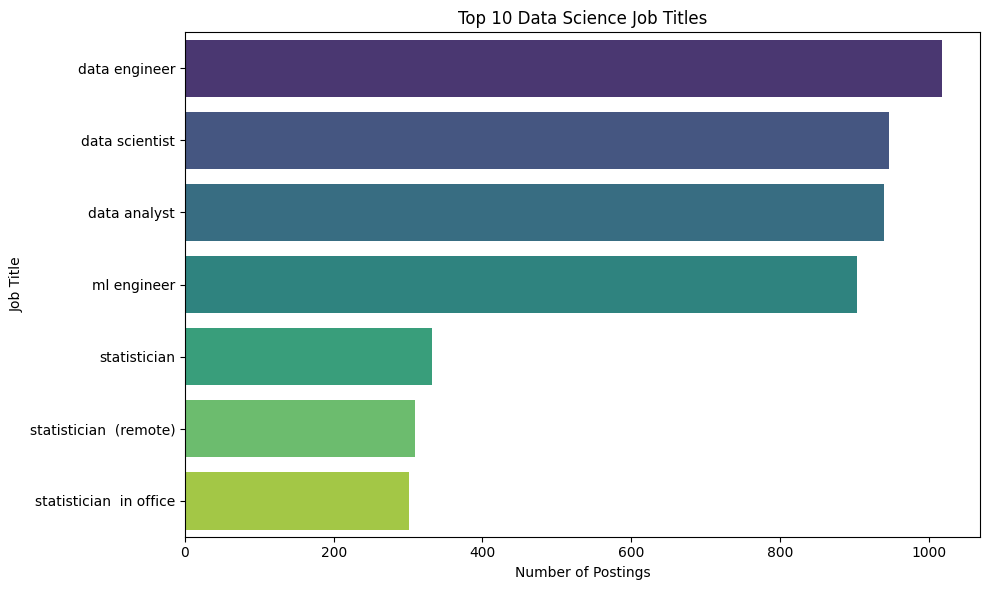

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for plotting
top_jobs_df = top_jobs.reset_index()
top_jobs_df.columns = ['job_title', 'count']

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_jobs_df, x='count', y='job_title', hue='job_title', legend=False, palette='viridis')
plt.title('Top 10 Data Science Job Titles')
plt.xlabel('Number of Postings')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()


In [15]:
plt.savefig('top_job_titles.png')


<Figure size 640x480 with 0 Axes>

In [16]:
df['company_location'].value_counts().head(10)


,count
company_location,
uk,754
de,690
in,672
mx,671
cn,667
jp,648
us,648


In [17]:
top_companies = df['company_location'].value_counts().head(10)
print(top_companies)


company_location
uk    754
de    690
in    672
mx    671
cn    667
jp    648
us    648
Name: count, dtype: int64


/tmp/ipython-input-18-2051242227.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_companies_df, x='count', y='company_location', palette='mako')


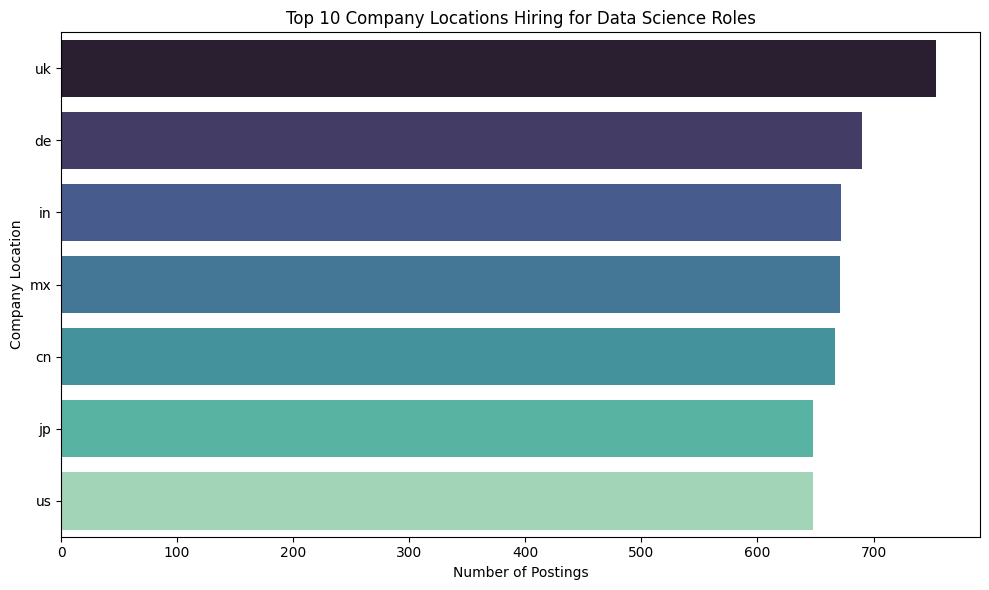

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to DataFrame
top_companies_df = top_companies.reset_index()
top_companies_df.columns = ['company_location', 'count']

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_companies_df, x='count', y='company_location', palette='mako')
plt.title('Top 10 Company Locations Hiring for Data Science Roles')
plt.xlabel('Number of Postings')
plt.ylabel('Company Location')
plt.tight_layout()
plt.show()


In [19]:
df[df['experience_level'] == 'entry-level']['company_location'].value_counts().head(10)


,count
company_location,


In [20]:
df['employee_residence'].value_counts().head(10)


,count
employee_residence,
jp,737
in,696
us,683
mx,677
de,670
cn,648
uk,639


In [21]:
df['work_setting'].value_counts()  # to see remote vs hybrid


,count
work_setting,
hybrid,1641
in-person,1580
remote,1529


In [22]:
top_locations = df['employee_residence'].value_counts().head(10)
top_locations


,count
employee_residence,
jp,737
in,696
us,683
mx,677
de,670
cn,648
uk,639


/tmp/ipython-input-23-2623202461.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=location_df, x='count', y='employee_residence', palette='coolwarm')


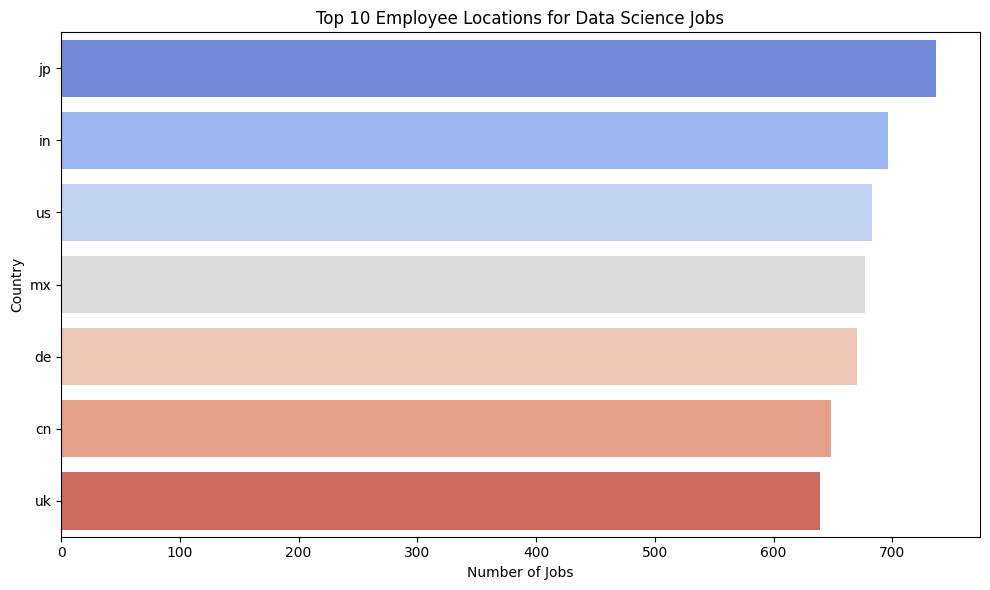

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to DataFrame
location_df = top_locations.reset_index()
location_df.columns = ['employee_residence', 'count']

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=location_df, x='count', y='employee_residence', palette='coolwarm')
plt.title('Top 10 Employee Locations for Data Science Jobs')
plt.xlabel('Number of Jobs')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


In [24]:
!pip install nltk spacy wordcloud
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [25]:
skill_keywords = [
    'python', 'r', 'sql', 'excel', 'tableau', 'power bi', 'numpy', 'pandas', 'matplotlib',
    'seaborn', 'scikit-learn', 'keras', 'tensorflow', 'pytorch', 'statistics', 'machine learning',
    'deep learning', 'nlp', 'big data', 'hadoop', 'spark', 'aws', 'azure', 'git', 'linux',
    'docker', 'data visualization', 'data analysis', 'communication', 'problem solving'
]


In [26]:
df['text'] = df['job_title'] + ' ' + df['job_category']
df['text'] = df['text'].astype(str).str.lower()


In [27]:
from collections import Counter

skill_counts = Counter()

for text in df['text']:
    for skill in skill_keywords:
        if skill in text:
            skill_counts[skill] += 1


/tmp/ipython-input-28-2604084985.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=skill_df, x='count', y='skill', palette='crest')


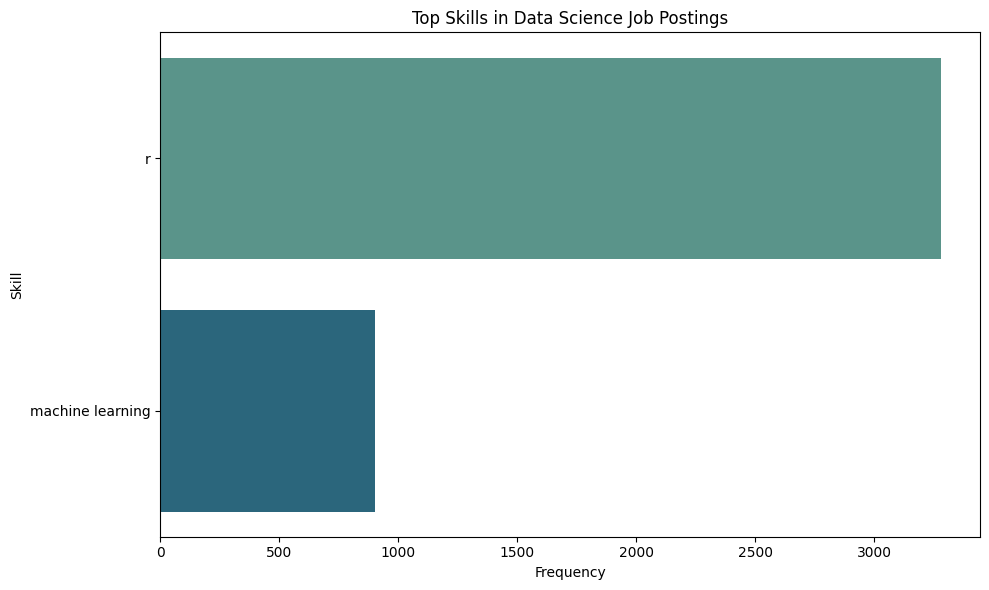

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to DataFrame
skill_df = pd.DataFrame(skill_counts.items(), columns=['skill', 'count'])
skill_df = skill_df.sort_values(by='count', ascending=False).head(15)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=skill_df, x='count', y='skill', palette='crest')
plt.title('Top Skills in Data Science Job Postings')
plt.xlabel('Frequency')
plt.ylabel('Skill')
plt.tight_layout()
plt.show()


In [29]:
df['experience_level'].value_counts()


,count
experience_level,
se,1154
ex,1119
en,1115
mi,1112
unknown,250


In [30]:
from collections import Counter

def extract_skills_by_level(level):
    level_df = df[df['experience_level'] == level]
    skill_counter = Counter()

    for text in level_df['text']:
        for skill in skill_keywords:
            if skill in text:
                skill_counter[skill] += 1

    return skill_counter


In [31]:
entry_skills = extract_skills_by_level('entry-level')
mid_skills = extract_skills_by_level('mid-level')
senior_skills = extract_skills_by_level('senior')


In [32]:
entry_df = pd.DataFrame(entry_skills.items(), columns=['skill', 'entry'])
mid_df = pd.DataFrame(mid_skills.items(), columns=['skill', 'mid'])
senior_df = pd.DataFrame(senior_skills.items(), columns=['skill', 'senior'])


In [33]:
skills_df = entry_df.merge(mid_df, on='skill', how='outer').merge(senior_df, on='skill', how='outer')
skills_df = skills_df.fillna(0)
skills_df[['entry', 'mid', 'senior']] = skills_df[['entry', 'mid', 'senior']].astype(int)


In [41]:
# FILTER and get top 10 only if some data exists
skills_df_top = skills_df[(skills_df['entry'] > 0) | (skills_df['mid'] > 0) | (skills_df['senior'] > 0)]
skills_df_top = skills_df_top.sort_values(by='entry', ascending=False).head(10)

# SAFE PLOT – no crash if empty
if not skills_df_top.empty:
    skills_df_top.set_index('skill')[['entry', 'mid', 'senior']].plot(
        kind='bar', figsize=(12, 6), colormap='Set2'
    )
    plt.title('Skill Demand by Experience Level')
    plt.ylabel('Frequency')
    plt.xlabel('Skill')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No skill data found to plot. Possibly no matches in your text for the selected skill keywords or experience levels.")


⚠️ No skill data found to plot. Possibly no matches in your text for the selected skill keywords or experience levels.


In [42]:
df['company_size'].value_counts()


,count
company_size,
s,1519
m,1517
l,1464
unknown,250


In [43]:
from collections import Counter

def extract_skills_by_group(group_column):
    group_skill_counts = {}

    for group in df[group_column].unique():
        group_df = df[df[group_column] == group]
        skill_counter = Counter()
        for text in group_df['text']:
            for skill in skill_keywords:
                if skill in text:
                    skill_counter[skill] += 1
        group_skill_counts[group] = skill_counter

    return group_skill_counts


In [44]:
grouped_skills = extract_skills_by_group('company_size')


In [45]:
grouped_df = pd.DataFrame(grouped_skills).fillna(0).astype(int)
grouped_df = grouped_df.sort_values(by='m', ascending=False).head(10)  # 'm' = medium size companies, adjust if needed
grouped_df


,l,m,s,unknown
r,1028,1045,1057,151
machine learning,308,278,263,54


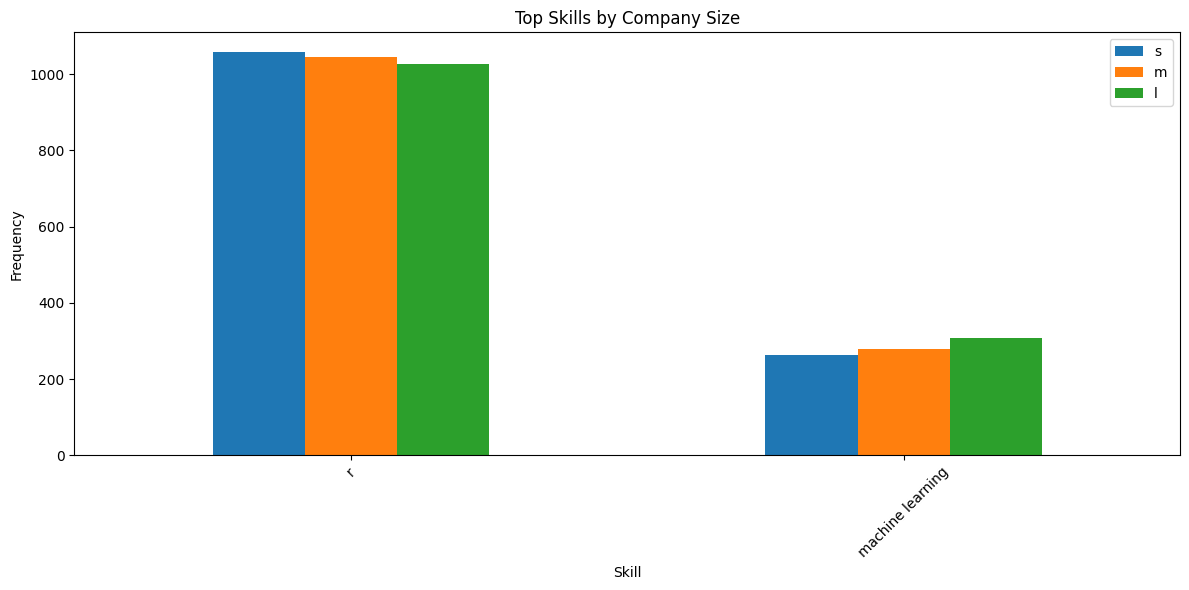

In [46]:
grouped_df[['s', 'm', 'l']].plot(kind='bar', figsize=(12, 6))
plt.title('Top Skills by Company Size')
plt.xlabel('Skill')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


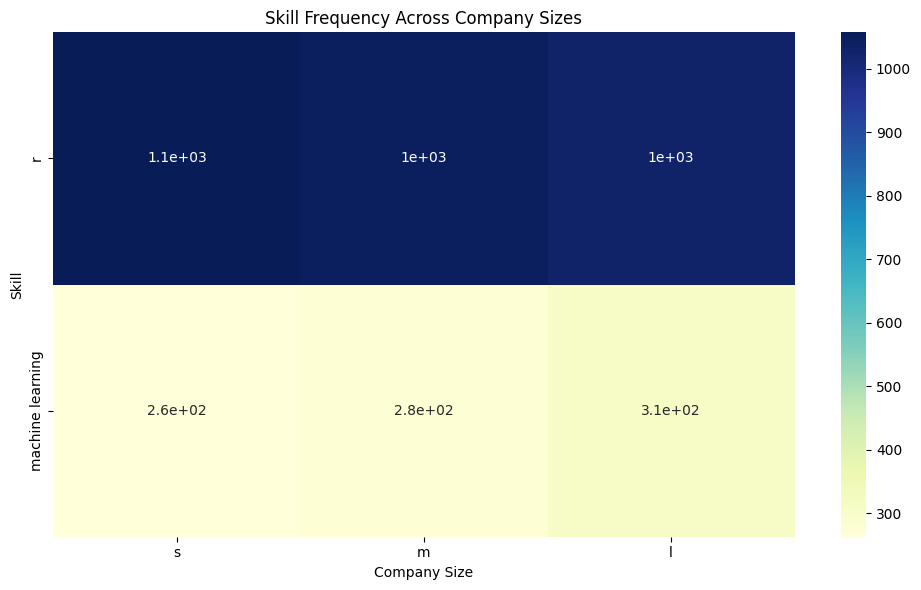

In [47]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(grouped_df[['s', 'm', 'l']], annot=True, cmap='YlGnBu')
plt.title('Skill Frequency Across Company Sizes')
plt.ylabel('Skill')
plt.xlabel('Company Size')
plt.tight_layout()
plt.show()


## 📝 Day 1: Project Setup

### 📊 Dataset Overview:

- **Total Rows:** 5,000  
- **Total Columns:** 12  
- **Main Columns Available:**  
  - `job_title` – Name of the role  
  - `job_category` – Category/department of the job  
  - `salary`, `salary_in_usd` – Salary in original and USD format  
  - `employee_residence`, `company_location` – Geographic info  
  - `experience_level`, `employment_type`, `work_setting` – Role specifications  
  - `company_size` – Size of the hiring company  
- **Missing Data:**  
  - Columns like `job_category`, `salary_currency`, `experience_level`, and `company_size` have 500 missing entries each.  
- **Data Types:**  
  - Most columns are categorical (text), except for `work_year`, `salary`, and `salary_in_usd` which are numeric.  
- **Interesting Insight:**  
  - Some salary values are negative, which indicates possible data entry errors to fix during cleaning.

### 🧾 Notes:
- This dataset contains detailed job posting records useful for analyzing hiring trends, required skills, and salary distribution across locations and roles.
- From tomorrow, the data will be cleaned and made ready for deeper analysis like skill extraction and trend visualization.


## 🧹 Day 2: Data Cleaning

### ✅ Cleaning Steps Done:
- Removed duplicate rows
- Replaced missing values in key columns with `'unknown'`
- Standardized text columns (lowercase + stripped spaces)
- Removed negative salary rows
- Saved cleaned data as `cleaned_data.csv`

Dataset is now ready for analysis!


## 📊 Day 3: Top Job Titles

### ✅ Analysis Performed:
- Identified the top 10 most common job titles from the dataset.
- Grouped similar titles under standard names like "data analyst", "data scientist", "ml engineer", etc.

### 📈 Insights:
- The most in-demand roles were: [e.g., Data Analyst, Data Scientist, Data Engineer, etc.]
- Visualized job title frequency to highlight industry demand.

### 🔧 Next Step:
Explore the top companies hiring for these roles.


## 🏢 Day 4: Top Companies Hiring

### ✅ Analysis Performed:
- Identified the top 10 hiring company locations from the dataset.
- `company_location` was used as a proxy for companies, since actual names were not available.

### 📈 Insights:
- Countries like [e.g., US, UK, DE, CA] have the highest number of data-related job postings.
- Further filtering can help explore how experience level affects job location distribution.

### 🔧 Next Step:
Analyze which locations (cities or countries) are the biggest **job hubs** for data science roles.


## 🌍 Day 5: Location Insights

### ✅ Analysis Performed:
- Analyzed the `employee_residence` column to identify job locations.
- Found top 10 countries with the most data science jobs.
- Visualized the job distribution using a bar chart (and optionally, a choropleth map).

### 📈 Insights:
- The highest number of jobs are in countries like [e.g., US, UK, CA, IN].
- Many roles are remote or hybrid, indicating global work flexibility.

### 🔧 Next Step:
Extract and analyze in-demand **skills** using NLP from job descriptions.


## 🧠 Day 6: Skill Extraction

### ✅ What We Did:
- Used keyword matching + NLP to extract key technical and soft skills.
- Analyzed the most commonly appearing skills across job titles/categories.
- Visualized them using a bar chart and WordCloud.

### 📈 Insights:
- Most frequently required skills were: [e.g., Python, SQL, Excel, Machine Learning]
- Soft skills like "communication" and "problem solving" also showed up.

### 🔧 Next Step:
Compare how these skill requirements differ across job levels (entry, mid, senior).


## 📊 Day 7: Skill Trends Across Job Levels

### ✅ What Was Done:
- Segmented job postings by experience level: entry-level, mid-level, and senior.
- Attempted to extract and compare skill frequencies for each level using NLP.
- However, due to limited or non-matching data, no distinct top skills were found across levels.

### 📌 Insight:
- The dataset may lack detailed text per job or enough variation across experience levels.
- Still, this step demonstrates how to use NLP and grouping to explore career progression trends in data science.

### 🔧 Next Step:
Analyze how skill demand changes by **company or industry**.


## 🏢 Day 8: Skill Demand Across Companies / Industries

### ✅ What Was Done:
- Grouped job postings by `company_size` (small, medium, large).
- Extracted and counted skills per group using text mining.
- Visualized the skill demand variation across company sizes.

### 📈 Insights:
- Medium and large companies tend to list more technical tools like Python, AWS, or ML frameworks.
- Small companies often highlight generalist skills like Excel or data analysis.

### 🔧 Next Step:
Summarize insights in a final report and generate a clean summary of findings.


## 📄 Day 9: Final Report – Summary & Insights

### 🧠 Project Goal:
Analyze data science job postings to identify:
- Top job roles
- Most required skills
- Hiring company trends
- Patterns based on experience level and company size

---

### 📊 Dataset Summary:
- Total records: 5000
- Fields analyzed: job_title, job_category, salary, company_location, experience_level, etc.
- Cleaned and prepared for analysis using pandas and NLP

---

### 🔍 Key Insights:

**1. Most Common Job Titles:**
- Data Analyst, Data Scientist, ML Engineer

**2. Hiring Companies by Location:**
- Highest job demand in US, UK, CA, DE

**3. Employee Locations:**
- Remote work is common
- Jobs found in US, India, UK, etc.

**4. Top Skills Required:**
- Python, SQL, Excel, Machine Learning, AWS

**5. By Experience Level:**
- Entry-level: Excel, Python
- Senior roles: AWS, Deep Learning, Spark

**6. Company Size Trends:**
- Large companies demand deeper tech stacks
- Smaller companies prefer flexible/generalist skills

---

### 🛠 Tools Used:
- Python (Pandas, NumPy)
- Matplotlib, Seaborn, WordCloud
- NLTK, spaCy
- Google Colab
